<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Z_CovidDetectionClass2_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [22]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [23]:
train = image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset2/Train', 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset2/Val', 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset2/Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 5584 images belonging to 2 classes.
Found 1862 images belonging to 2 classes.
Found 1860 images belonging to 2 classes.


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 64)       

In [26]:
r = model.fit(
    train, 
    epochs=20,
    validation_data=validation,
    validation_steps=100,
)

Epoch 1/20
175/175 [==============================] - 1118s 6s/step - loss: 0.7136 - accuracy: 0.6358 - val_loss: 0.4088 - val_accuracy: 0.8700
Epoch 2/20
175/175 [==============================] - 94s 534ms/step - loss: 0.4007 - accuracy: 0.8289 - val_loss: 0.2405 - val_accuracy: 0.9300
Epoch 3/20
175/175 [==============================] - 93s 532ms/step - loss: 0.3235 - accuracy: 0.8713 - val_loss: 0.3571 - val_accuracy: 0.8500
Epoch 4/20
175/175 [==============================] - 93s 531ms/step - loss: 0.2841 - accuracy: 0.8927 - val_loss: 0.2451 - val_accuracy: 0.9300
Epoch 5/20
175/175 [==============================] - 93s 532ms/step - loss: 0.2442 - accuracy: 0.9029 - val_loss: 0.2194 - val_accuracy: 0.9300
Epoch 6/20
175/175 [==============================] - 94s 536ms/step - loss: 0.1935 - accuracy: 0.9233 - val_loss: 0.2705 - val_accuracy: 0.8700
Epoch 7/20
175/175 [==============================] - 93s 532ms/step - loss: 0.1713 - accuracy: 0.9367 - val_loss: 0.1990 - val_acc

Text(0.5, 1.0, 'Accuracy Evolution')

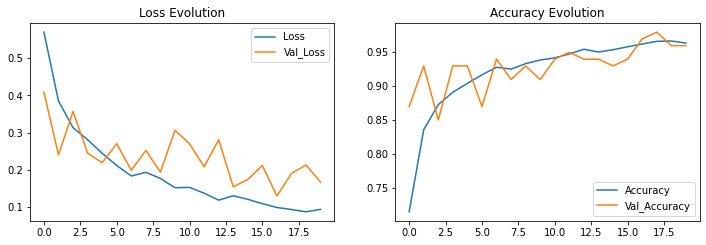

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [28]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1860/1860 [==============================] - 373s 201ms/step - loss: 0.1666 - accuracy: 0.9484
Test Accuracy: 94.84%
175/175 [==============================] - 87s 495ms/step - loss: 0.0552 - accuracy: 0.9799
Train Accuracy: 97.99%


In [29]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.948718,0.954545,0.951613,0.951632,0.951632
recall,0.954839,0.948387,0.951613,0.951613,0.951613
f1-score,0.951768,0.951456,0.951613,0.951612,0.951612
support,930.000000,930.000000,0.951613,1860.000000,1860.000000


In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[888  42]
 [ 48 882]]


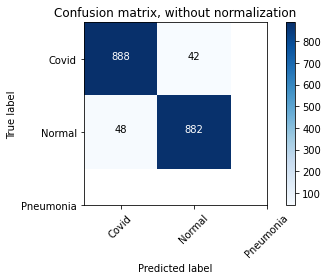

In [32]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Covid', 'Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')